In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Dataset: 2014 Boston Marathon participant information

In [74]:
df_bm = pd.read_csv('bm_2014.cvs', sep=',')

df_bm.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [75]:
df_bm.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [76]:
df_bm = df_bm.drop(['name','bib','ctz','state','city','genderdiv','division','overall'],axis=1)

In [77]:
df_bm['gender'] = df_bm.gender.map(lambda x: 0 if x is 'F' else 1)

In [78]:
columns = df_bm[['10k', '25k', 'age', 'official', '35k', 'pace', '30k', '5k', 'half','20k', '40k','gender']]

for column in columns: 
    df_bm[column] = pd.to_numeric(df_bm[column], errors='coerce')

In [79]:
df_bm.dtypes

10k         float64
25k         float64
gender        int64
age           int64
official    float64
35k         float64
pace        float64
30k         float64
5k          float64
half        float64
20k         float64
country      object
40k         float64
dtype: object

In [80]:
total_missing = df_bm.isnull().sum().sort_values(ascending=False) 
                    #find the total null data values in each column based on percentage of data points in each column 

percent_missing = (df_bm.isnull().sum()/df_bm.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
25k,216,0.006753
half,72,0.002251
5k,52,0.001626
20k,51,0.001595
10k,50,0.001563
30k,40,0.001251
40k,39,0.001219
35k,34,0.001063
country,0,0.000000
pace,0,0.000000


In [81]:
df_bm = df_bm.dropna()

In [82]:
total_missing = df_bm.isnull().sum().sort_values(ascending=False) 
                    #find the total null data values in each column based on percentage of data points in each column 

percent_missing = (df_bm.isnull().sum()/df_bm.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
40k,0,0.0
country,0,0.0
20k,0,0.0
half,0,0.0
5k,0,0.0
30k,0,0.0
pace,0,0.0
35k,0,0.0
official,0,0.0
age,0,0.0


In [107]:
country_list = ['JPN', 'KEN', 'RSA', 'ETH', 'SUI', 'USA', 'FRA', 'CAN', 'ESP',
       'POL', 'RUS', 'BLR', 'MAR', 'UKR', 'BRA', 'THA', 'CHN', 'ITA',
       'GER', 'GBR', 'AUS', 'SWE', 'GRE', 'SLO', 'IRL', 'KOR', 'ARG',
       'COL', 'NED', 'ISR', 'CZE', 'NOR', 'CRC', 'MEX', 'GUA', 'SIN',
       'DEN', 'HUN', 'BEL', 'FIN', 'AUT', 'CHI', 'ISL', 'VEN', 'DOM',
       'PER', 'HKG', 'SVK', 'NZL', 'TPE', 'PHI', 'CAY', 'POR', 'UAE',
       'IND', 'PAN', 'ROU', 'LUX', 'ESA', 'TRI', 'MAS', 'VGB', 'EGY',
       'BRN', 'EST', 'ECU', 'LIE', 'TUR', 'BOL', 'BAR', 'URU', 'QAT',
       'INA', 'BER', 'TAN', 'BAH', 'CRO', 'ZIM']

country_list.sort()
country_list = pd.DataFrame(country_list)
country_list.loc[ 74 , 0 ]

'USA'

In [84]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df_bm['country_code'] = LE.fit_transform(df_bm['country'])

In [85]:
df_bm = df_bm.drop(['country'],axis=1)

In [88]:
df_bm.columns

Index(['10k', '25k', 'gender', 'age', 'official', '35k', 'pace', '30k', '5k',
       'half', '20k', '40k', 'country_code'],
      dtype='object')

# Cluster Investigation

In [87]:
# Make sure the number of rows divides evenly into four samples.
rows = df_bm.shape[0] - df_bm.shape[0] % 4
df_bm = df_bm.iloc[:rows, :]

In [89]:
X = df_bm
# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=231)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=231)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=231)

In [90]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

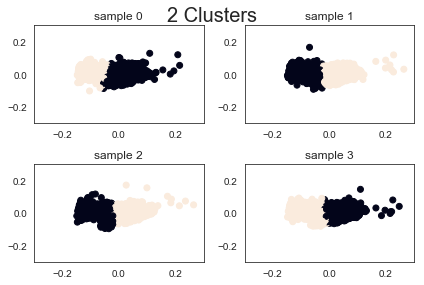

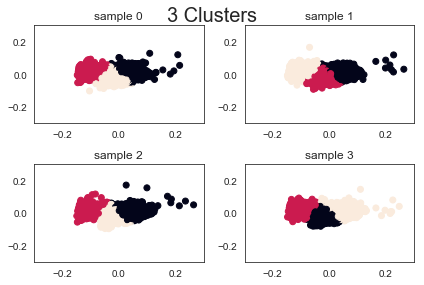

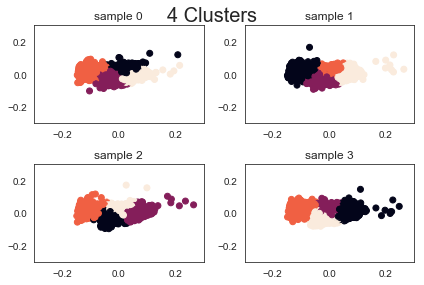

In [91]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [127]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=231).fit(sample)
    labels = model.labels_
    print("Silho. Score: {}".format(metrics.silhouette_score(sample, labels, metric='euclidean')))

Silho. Score: 0.5247402837788456
Silho. Score: 0.42760669670622364
Silho. Score: 0.4279555740585321
Silho. Score: 0.41042001228537317


## silhouette scores are quite low and scores between clusters are not consistent.

# Mean Shift 

In [128]:
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred', 'quantile'])

for counter, data in enumerate([X1, X2, X3, X4]):    
    for n in [0.1, 0.2, 0.3, 0.4]:
        
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(X1, quantile=n, n_samples=500)
        
        # Ensuring all sets are the same lenght
        data = X1[:4013][:]
        
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True)

In [129]:
score_ms.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,quantile,silhouette_score
3,clust4_sample0,0.4,0.417338
7,clust4_sample1,0.4,0.417338
11,clust4_sample2,0.4,0.417338
15,clust4_sample3,0.4,0.417338
2,clust6_sample0,0.3,0.416441
6,clust6_sample1,0.3,0.416441
10,clust6_sample2,0.3,0.416441
14,clust6_sample3,0.3,0.416441
1,clust7_sample0,0.2,0.298201
5,clust7_sample1,0.2,0.298201


## performance seems to be worse than kmeans, however we see that the larger quantile relates better results.

# Spectral Clustering

In [130]:
# Initialize data frames
ypred_sc = pd.DataFrame()
score_sc = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred_sc['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred_sc['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 6):
        # Instantiating and fit_predicting model to then add to data frame
        sc = SpectralClustering(n_clusters=nclust)
        pred = sc.fit_predict(data[0])
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = sc.labels_
        sscore_sc = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score_sc = score_sc.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore_sc}, ignore_index=True)

In [131]:
score_sc.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,silhouette_score
8,clust2_sample2,0.443819
0,clust2_sample0,0.442609
4,clust2_sample1,0.435914
12,clust2_sample3,0.433419
9,clust3_sample2,0.334603
13,clust3_sample3,0.334330
5,clust3_sample1,0.329001
1,clust3_sample0,0.326897
14,clust4_sample3,0.271654
10,clust4_sample2,0.271013


## Accuracy improved slightly from the mean shift algorithm.
## There are no discenable paterns in the number of clustering groups between the models.

# Affinity Propagation

In [132]:
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    
    # Ensuring all sets are the same lenght
    data = data[:4013][:]
    
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'silhouette_score':sscore_af}, ignore_index=True)

In [133]:
score_af.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,silhouette_score
0,clust106_sample0,0.186377
3,clust100_sample3,0.185578
2,clust109_sample2,0.184079
1,clust102_sample1,0.182299


## Affinity Propogation is clearly the least accurate method for this dataset

# Summary

- Over all, the 3 cluster method return the highest scores on average. This analysis suggests there are 3 main groups of runners that participated in the Boston Marathon.
- Although, none of the algorithms returned accuracies above 52%. 

# Kmeans Analysis 

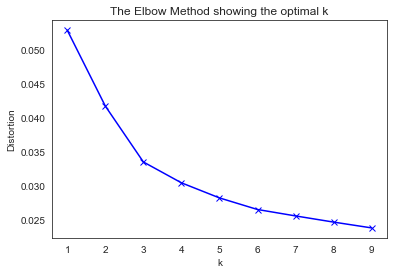

In [93]:
from scipy.spatial.distance import cdist
# Use the elbow method to see what is the optimal amount of clusters.

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X1)
    kmeanModel.fit(X1)
    distortions.append(sum(np.min(cdist(X1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X1.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## By the elbow plot, we see that 3 is the optimal cluster count given that adding a 4th cluster only reduced the sum of squared errors less than .005.

# Kmean Cluster Descriptions

In [94]:
cluster_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(3):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print('\n')
    print(frame.describe())

0


                10k           25k        gender           age      official  \
count  14334.000000  14334.000000  14334.000000  14334.000000  14334.000000   
mean      44.475580    112.611163      0.681666     39.813939    199.597339   
std        4.080224     10.209256      0.465846      9.764194     19.248270   
min       16.620000     45.800000      0.000000     18.000000     80.600000   
25%       41.980000    105.880000      0.000000     32.000000    186.955000   
50%       44.820000    113.900000      1.000000     40.000000    202.650000   
75%       47.600000    120.670000      1.000000     47.000000    214.670000   
max       54.130000    133.380000      1.000000     76.000000    260.430000   

                35k          pace           30k            5k          half  \
count  14334.000000  14334.000000  14334.000000  14334.000000  14334.000000   
mean     162.271801      7.620998    136.831282     22.237404     94.536462   
std       15.055982      0.734209     12.490756

# Analysis

### Cluster 0
- Average age in the first cluster of runners is 40 years old, standard deviation of 9.8 years.
- More than half of the participants are male, on average.
- Runners pace was 7.6 minutes per mile. 

### Cluster 1
- Average age in the first cluster of runners is 43 years old, standard deviation of 13 years.
- More than half of the participants are female.
- Runners pace was 12.5 minutes per mile.

### Cluster 3
- Average age in the first cluster of runners is 45 years old, standard deviation of 11.5 years.
- More than half of the participants are female.
- Runners pace was 9.6 miles per minute 

# Data Story

In [112]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=231).fit_predict(X_norm)

df_y = pd.DataFrame(y_pred)
df_y.columns = ['Cluster']

# Add the outcome back onto X
combined = X.join(df_y, how='inner')
combined.head()

,10k,25k,gender,age,official,35k,pace,30k,5k,half,20k,40k,country_code,Cluster
0,17.37,47.67,1,47,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43,41,0
1,32.58,82.43,0,33,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10,42,0
2,16.62,45.80,1,41,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10,59,0
3,32.57,82.43,0,24,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95,26,1
4,17.12,46.37,1,40,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72,41,0


In [113]:
# Create age buckets

def age_bucket(age):
    output = ''
    if age <=20:
        output = 'Under 20'
    elif (age > 20 and age <= 30):
        output = 'Between 20 and 30'
    elif (age > 30 and age <= 40):
        output = 'Between 30 and 40'
    elif (age > 40 and age <= 50):
        output = 'Between 40 and 50'
    elif (age > 50 and age <= 60):
        output = 'Between 50 and 60'
    else:
        output = 'Over 60'
    
    return output

In [114]:
combined['Age Bucket'] = combined['age'].apply(lambda x: age_bucket(x))

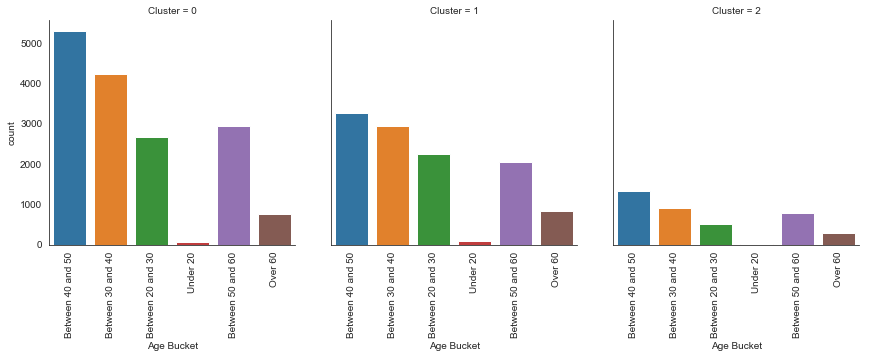

In [115]:
# Look at Gender Breakdown for Count
g = sns.factorplot(x='Age Bucket', col='Cluster', kind="count", data=combined, size=4)
g.set_xticklabels(rotation=90)

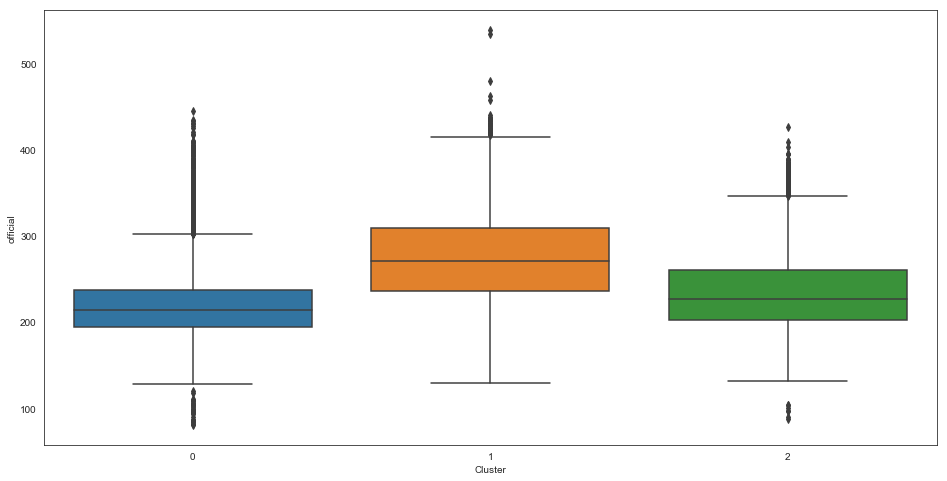

In [116]:
# Official time between the groups
plt.figure(figsize=(16,8))
sns.boxplot(x='Cluster',y='official',data=combined)

## from the plots of official times and age data, we see that the cluster with the highest amount of ages over 30 years old also had the quickest marathon times. 

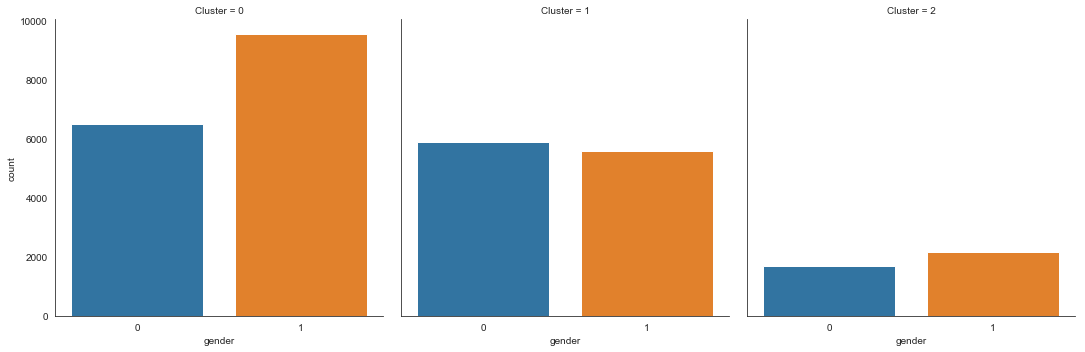

In [117]:
sns.factorplot(x='gender', col='Cluster', kind="count", data=combined, size=5)

## we also see that the grouping with the most male(1) runners recorded the strongest time.  

In [123]:
# Separate the clusters
c_0 = combined[combined['Cluster']==0]
c_1 = combined[combined['Cluster']==1]
c_2 = combined[combined['Cluster']==2]

In [124]:
# check Gender Breakdown
c_0['gender'].value_counts()

1    9551
0    6481
Name: gender, dtype: int64

In [125]:
c_1['gender'].value_counts()

0    5880
1    5566
Name: gender, dtype: int64

In [126]:
c_2['gender'].value_counts()

1    2168
0    1680
Name: gender, dtype: int64

## given the diversity of the gender distributions between each cluster, we see that the kmeans algorithm prioritized marathon times to create the cluster distinctions.